# Basic Dataset Analysis in Python

### Prepared by Olivia Rueschhoff
This notebook performs data cleaning, feature engineering, and exploratory data analysis on a \textbf{simulated} survey dataset. Although the data represents randomly generated individuals, the workflow mirrors what a data scientist would do with a real-world demographic survey. 

#### The goals of this analysis are:
- To inspect the structure and quality of the dataset
- To clean and prepare variables for analysis
- To engineer new features that improve interpretability
- To explore distributions and relationships through visualizations
- To demonstrate reproducible, well-documented data science practices

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import stemgraphic
from random import sample

In [29]:
# Load dataset
os.getcwd()
os.chdir("C:/Users/ruesc/OneDrive/Documents/Portfolio")
d1 = pd.read_csv("SimulatedSurveyData.csv")
d1.head()

,Unnamed: 0,X,SW,MOI,YOI,DOI_CMC,RMOB,RYOB,RDOB_CMC,RCA,...,DOFB_CMC,AOR,MTFBI,DSOUOM_CMC,RW,RH,RBMI,ID,CEB1,CEB2
0,1,1,504153,8,2011,1340,3,1974,891,37,...,1112.0,18.0,43.0,NaN,402,1525,1729,132,4,3
1,2,2,504153,8,2011,1340,3,1992,1107,19,...,1339.0,19.0,43.0,NaN,354,1459,1663,133,2,12
2,3,3,504153,8,2011,1340,2,1986,1034,25,...,1248.0,17.0,21.0,1339.0,483,1605,1875,174,5,4
3,4,4,504153,8,2011,1340,9,1980,969,30,...,1160.0,15.0,34.0,1319.0,401,1473,1848,1132,6,4
4,5,5,504153,8,2011,1340,6,1986,1038,25,...,1232.0,16.0,33.0,1332.0,501,1485,2272,1162,1,6


## Checking the Shape of the Dataset

Understanding the number of rows and columns helps us gauge dataset size and complexity.

In [30]:
d1.shape

(17842, 32)

## Inspecting Data Types and Structure

We examine variable types and overall structure to identify potential cleaning needs and confirm that the dataset loaded correctly.

In [31]:
d1.info()
d1.dtypes
print("All variable data types are numeric for d1")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17842 entries, 0 to 17841
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17842 non-null  int64  
 1   X           17842 non-null  int64  
 2   SW          17842 non-null  int64  
 3   MOI         17842 non-null  int64  
 4   YOI         17842 non-null  int64  
 5   DOI_CMC     17842 non-null  int64  
 6   RMOB        17842 non-null  int64  
 7   RYOB        17842 non-null  int64  
 8   RDOB_CMC    17842 non-null  int64  
 9   RCA         17842 non-null  int64  
 10  Region      17842 non-null  int64  
 11  TPR         17842 non-null  int64  
 12  DPR         17842 non-null  int64  
 13  NV          17842 non-null  int64  
 14  HEL         17842 non-null  int64  
 15  Has_Radio   17842 non-null  int64  
 16  Has_TV      17842 non-null  int64  
 17  Religion    17842 non-null  int64  
 18  WI          17842 non-null  int64  
 19  MOFB        12335 non-nul

## Removing Non‑Analytical Columns

The `ID` column is a unique identifier and does not contribute to analysis, so we remove it to keep the dataset tidy.

In [32]:
# Delete ID Variable
d1 = d1.drop(columns=["ID"])
d1.head(4)

,Unnamed: 0,X,SW,MOI,YOI,DOI_CMC,RMOB,RYOB,RDOB_CMC,RCA,...,DOB_CMC,DOFB_CMC,AOR,MTFBI,DSOUOM_CMC,RW,RH,RBMI,CEB1,CEB2
0,1,1,504153,8,2011,1340,3,1974,891,37,...,1285.0,1112.0,18.0,43.0,NaN,402,1525,1729,4,3
1,2,2,504153,8,2011,1340,3,1992,1107,19,...,1339.0,1339.0,19.0,43.0,NaN,354,1459,1663,2,12
2,3,3,504153,8,2011,1340,2,1986,1034,25,...,1334.0,1248.0,17.0,21.0,1339.0,483,1605,1875,5,4
3,4,4,504153,8,2011,1340,9,1980,969,30,...,1187.0,1160.0,15.0,34.0,1319.0,401,1473,1848,6,4


## Checking for Missing Values

Survey data often contains missing responses.  
Here we inspect null values in selected variables to understand data quality.

In [33]:
d1[['MOFB', 'YOB', 'AOR']].isnull().sum()

MOFB    5507
YOB     5507
AOR     1817
dtype: int64

## Creating a Focused Subset of Variables

We select a subset of variables relevant to the analysis to simplify the workflow and reduce noise.

In [34]:
d2 = d1[['RMOB', 'WI', 'RCA', 'Religion', 'Region', 'AOR', 'HEL',
        'DOB_CMC', 'DOFB_CMC', 'MTFBI', 'RW', 'NV', 'RBMI', 'TPR']]
d2.head()

,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR
0,3,3,37,1,1,18.0,1,1285.0,1112.0,43.0,402,1,1729,2
1,3,3,19,1,1,19.0,2,1339.0,1339.0,43.0,354,1,1663,2
2,2,3,25,1,1,17.0,2,1334.0,1248.0,21.0,483,1,1875,2
3,9,4,30,1,1,15.0,1,1187.0,1160.0,34.0,401,1,1848,2
4,6,2,25,1,1,16.0,2,1316.0,1232.0,33.0,501,1,2272,2


## Adding a Row‑Wise Missingness Count

A `MISSING` column is created to quantify how many values are missing per record.  
This can reveal patterns in missing data.

In [35]:
d2['MISSING'] = d2.isnull().sum(axis=1)
d2.head()

C:\Users\ruesc\AppData\Local\Temp\ipykernel_9480\2750056382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['MISSING'] = d2.isnull().sum(axis=1)


,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR,MISSING
0,3,3,37,1,1,18.0,1,1285.0,1112.0,43.0,402,1,1729,2,0
1,3,3,19,1,1,19.0,2,1339.0,1339.0,43.0,354,1,1663,2,0
2,2,3,25,1,1,17.0,2,1334.0,1248.0,21.0,483,1,1875,2,0
3,9,4,30,1,1,15.0,1,1187.0,1160.0,34.0,401,1,1848,2,0
4,6,2,25,1,1,16.0,2,1316.0,1232.0,33.0,501,1,2272,2,0


## Removing Incomplete Records

For this analysis, we drop rows with missing values to ensure clean computations and visualizations.

In [36]:
d3 = d2.dropna()
d3.describe()

,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR,MISSING
count,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.000000,16025.0
mean,6.437067,3.128799,31.841373,1.120562,3.934727,17.902902,1.210109,1252.649360,1174.190078,35.436505,702.477566,1.020218,2343.204431,1.655476,0.0
std,3.491742,1.424111,8.886835,0.356198,1.901758,3.323532,0.930617,75.324979,107.317852,83.808245,1398.123557,0.161018,1243.569493,0.475228,0.0
min,1.000000,1.000000,13.000000,1.000000,1.000000,11.000000,0.000000,921.000000,893.000000,0.000000,229.000000,1.000000,1245.000000,1.000000,0.0
25%,3.000000,2.000000,24.000000,1.000000,2.000000,16.000000,0.000000,1212.000000,1091.000000,12.000000,423.000000,1.000000,1876.000000,1.000000,0.0
50%,6.000000,3.000000,31.000000,1.000000,4.000000,17.000000,1.000000,1273.000000,1188.000000,22.000000,482.000000,1.000000,2114.000000,2.000000,0.0
75%,10.000000,4.000000,39.000000,1.000000,6.000000,19.000000,2.000000,1311.000000,1264.000000,38.000000,556.000000,1.000000,2420.000000,2.000000,0.0
max,12.000000,5.000000,49.000000,4.000000,7.000000,40.000000,3.000000,1344.000000,1344.000000,996.000000,9999.000000,3.000000,9999.000000,2.000000,0.0


## Sorting Columns for Readability

Sorting columns alphabetically helps maintain a consistent and readable dataset structure.

In [37]:
d3 = d3.sort_index(axis=1)
d3.head()

,AOR,DOB_CMC,DOFB_CMC,HEL,MISSING,MTFBI,NV,RBMI,RCA,RMOB,RW,Region,Religion,TPR,WI
0,18.0,1285.0,1112.0,1,0,43.0,1,1729,37,3,402,1,1,2,3
1,19.0,1339.0,1339.0,2,0,43.0,1,1663,19,3,354,1,1,2,3
2,17.0,1334.0,1248.0,2,0,21.0,1,1875,25,2,483,1,1,2,3
3,15.0,1187.0,1160.0,1,0,34.0,1,1848,30,9,401,1,1,2,4
4,16.0,1316.0,1232.0,2,0,33.0,1,2272,25,6,501,1,1,2,2


## Feature Engineering: Creating an Average Age‑Related Variable

We compute the mean of several age‑related variables to create a more interpretable feature.

In [38]:
initial = ['DOB_CMC','DOFB_CMC', 'MTFBI']
d3["New Avg"] = d3[initial].mean(axis=1)
# displaying them together
d3[['New Avg', 'DOB_CMC','DOFB_CMC', 'MTFBI']].head()

,New Avg,DOB_CMC,DOFB_CMC,MTFBI
0,813.333333,1285.0,1112.0,43.0
1,907.000000,1339.0,1339.0,43.0
2,867.666667,1334.0,1248.0,21.0
3,793.666667,1187.0,1160.0,34.0
4,860.333333,1316.0,1232.0,33.0


## Recoding Religion into Broader Categories

We bin the `Religion` variable into simplified groups to improve interpretability and prepare for categorical analysis.

In [40]:
religion_limit = d2['Religion'].max() + 1
ranges = [0.99, 1.1, religion_limit]
labels = [1, 2]

d3['New Religion'] = pd.cut(
    d3['Religion'],
    bins=ranges,
    right=False,
    labels=labels )
d3.head()

,AOR,DOB_CMC,DOFB_CMC,HEL,MISSING,MTFBI,NV,RBMI,RCA,RMOB,RW,Region,Religion,TPR,WI,New Avg,New Religion
0,18.0,1285.0,1112.0,1,0,43.0,1,1729,37,3,402,1,1,2,3,813.333333,1
1,19.0,1339.0,1339.0,2,0,43.0,1,1663,19,3,354,1,1,2,3,907.000000,1
2,17.0,1334.0,1248.0,2,0,21.0,1,1875,25,2,483,1,1,2,3,867.666667,1
3,15.0,1187.0,1160.0,1,0,34.0,1,1848,30,9,401,1,1,2,4,793.666667,1
4,16.0,1316.0,1232.0,2,0,33.0,1,2272,25,6,501,1,1,2,2,860.333333,1


## Categorizing MTFBI into BIC Groups (Numeric Labels)

We convert the continuous `MTFBI` variable into meaningful numeric categories.

In [43]:
bic_limit = d2['MTFBI'].max() + 1
ranges = [0, 9, 24, bic_limit]
bic_labels = [1, 2, 3]

d2['BIC'] = pd.cut(
    d2['MTFBI'].values,
    bins=ranges,
    right=False,
    labels=bic_labels
)
d2.head()

C:\Users\ruesc\AppData\Local\Temp\ipykernel_9480\3287274621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['BIC'] = pd.cut(


,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR,MISSING,BIC
0,3,3,37,1,1,18.0,1,1285.0,1112.0,43.0,402,1,1729,2,0,3
1,3,3,19,1,1,19.0,2,1339.0,1339.0,43.0,354,1,1663,2,0,3
2,2,3,25,1,1,17.0,2,1334.0,1248.0,21.0,483,1,1875,2,0,2
3,9,4,30,1,1,15.0,1,1187.0,1160.0,34.0,401,1,1848,2,0,3
4,6,2,25,1,1,16.0,2,1316.0,1232.0,33.0,501,1,2272,2,0,3


## Categorizing MTFBI into BIC Groups (Text Labels)

We repeat the binning process using descriptive labels to enhance readability.

In [46]:
labels = ['Early', 'Average', 'Late']
d2['BIC'] = pd.cut(
    d2['MTFBI'].values,
    bins=ranges,
    include_lowest = False, 
    right=False,
    labels=labels)
d2.head()

C:\Users\ruesc\AppData\Local\Temp\ipykernel_9480\1746534424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['BIC'] = pd.cut(


,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR,MISSING,BIC
0,3,3,37,1,1,18.0,1,1285.0,1112.0,43.0,402,1,1729,2,0,Late
1,3,3,19,1,1,19.0,2,1339.0,1339.0,43.0,354,1,1663,2,0,Late
2,2,3,25,1,1,17.0,2,1334.0,1248.0,21.0,483,1,1875,2,0,Average
3,9,4,30,1,1,15.0,1,1187.0,1160.0,34.0,401,1,1848,2,0,Late
4,6,2,25,1,1,16.0,2,1316.0,1232.0,33.0,501,1,2272,2,0,Late


## Filtering the Dataset Based on Conditions

We restrict the dataset to individuals meeting specific criteria to focus on a targeted subgroup.

In [23]:
d3 = d3[(d3["MTFBI"] > 10) & (d3["TPR"] == 2)].copy()
d3.head()

,AOR,DOB_CMC,DOFB_CMC,HEL,MISSING,MTFBI,NV,RBMI,RCA,RMOB,RW,Region,Religion,TPR,WI,New Avg,New Religion
0,18.0,1285.0,1112.0,1,0,43.0,1,1729,37,3,402,1,1,2,3,813.333333,1
1,19.0,1339.0,1339.0,2,0,43.0,1,1663,19,3,354,1,1,2,3,907.000000,1
2,17.0,1334.0,1248.0,2,0,21.0,1,1875,25,2,483,1,1,2,3,867.666667,1
3,15.0,1187.0,1160.0,1,0,34.0,1,1848,30,9,401,1,1,2,4,793.666667,1
4,16.0,1316.0,1232.0,2,0,33.0,1,2272,25,6,501,1,1,2,2,860.333333,1


## Visualizing MTFBI with a Boxplot

A boxplot helps identify the distribution, spread, and potential outliers of the `MTFBI` variable.

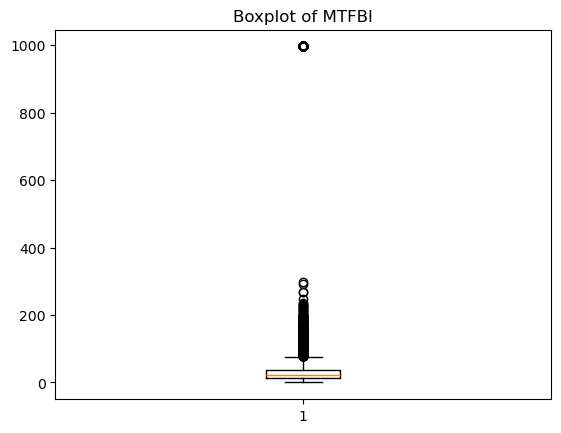

In [54]:
plt.boxplot(d3['MTFBI'])
plt.title("Boxplot of MTFBI")
plt.show()

## Histogram of RCA

A histogram shows the frequency distribution of the `RCA` variable.

Text(0, 0.5, 'Frequency')

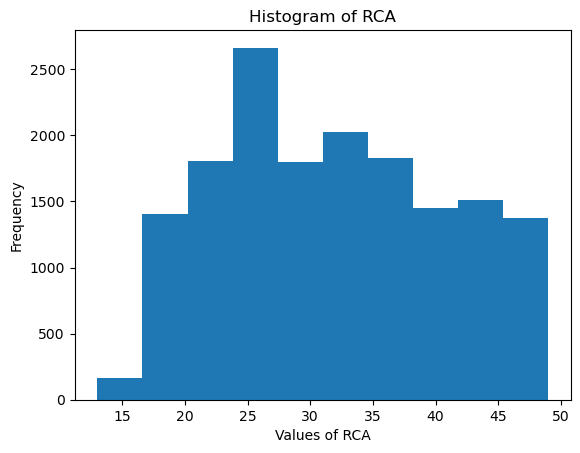

In [68]:
plt.hist( d3["RCA"])
plt.title("Histogram of RCA")
plt.xlabel("Values of RCA")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

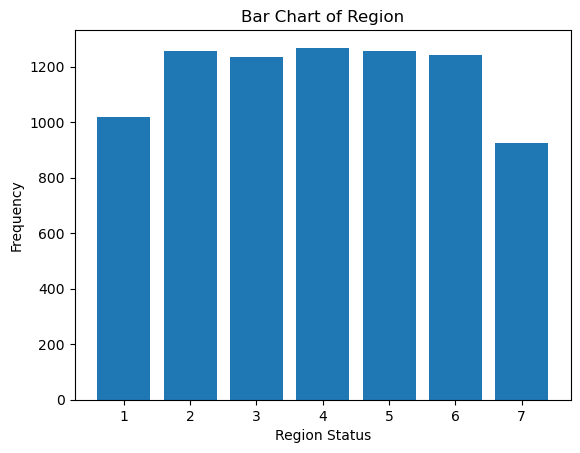

In [70]:
pd.crosstab(index=d3["Region"], columns="count")

x=[1,2,3,4,5,6,7]
y=[1019,1255, 1235, 1268, 1256, 1240, 926]

plt.bar(x,y)
plt.title("Bar Chart of Region")
plt.xlabel("Region Status")
plt.ylabel("Frequency")

## Pie Chart of Region Frequencies

A pie chart provides a proportional view of regional representation.

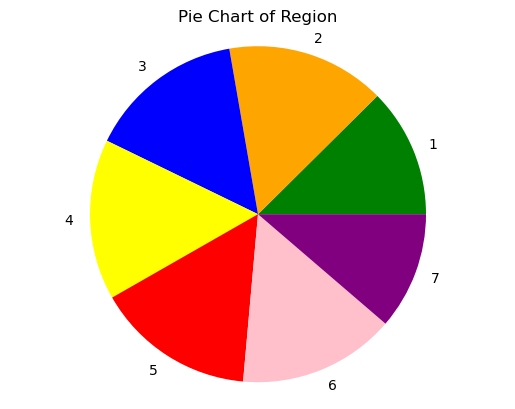

In [71]:
cols = ['green','orange','blue','yellow','red','pink','purple']

plt.pie(y, labels=x, colors=cols)
plt.title("Pie Chart of Region")
plt.axis('equal')
plt.show()


## Multi‑Plot Visualization

We combine multiple visualizations into a 2×2 grid to compare distributions side‑by‑side.

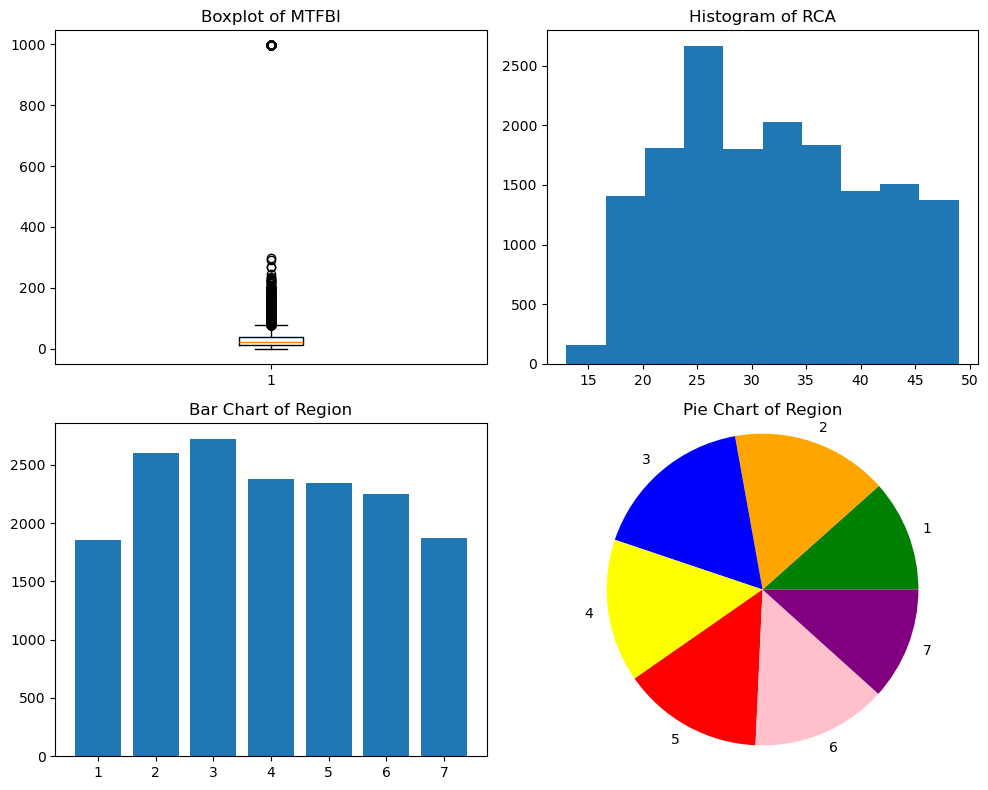

In [53]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.boxplot(d3['MTFBI'])
plt.title("Boxplot of MTFBI")

plt.subplot(2,2,2)
plt.hist(d3["RCA"])
plt.title("Histogram of RCA")

plt.subplot(2,2,3)
x = [1,2,3,4,5,6,7]
y = [1856,2604,2724,2379,2340,2252,1870]
plt.bar(x, y)
plt.title("Bar Chart of Region")

plt.subplot(2,2,4)
plt.pie(y, labels=x, colors=cols)
plt.title("Pie Chart of Region")
plt.axis('equal')

plt.tight_layout()
plt.show()


## Grouped Summary: Standard Deviation of MTFBI by NV

We compute the variability of `MTFBI` within each NV group.

In [55]:
d2.groupby("NV")["MTFBI"].std()

NV
1     83.409219
2     94.742355
3    141.124053
Name: MTFBI, dtype: float64

## Crosstab: Region by HEL

A contingency table helps us examine the relationship between region and HEL categories.

In [57]:
pd.crosstab(d2["Region"], d2["HEL"])

HEL,0,1,2,3
Region,,,,
1,314,744,811,197
2,681,794,1181,215
3,851,912,1011,310
4,581,763,1079,233
5,726,763,897,222
6,795,685,815,174
7,691,671,612,114


## Crosstab: Region by HEL and BIC

We extend the previous crosstab to include BIC categories for deeper insight.

In [59]:
pd.crosstab(d2["Region"], [d2["HEL"], d2["BIC"]])

HEL        0                  1                  2                  3          \
BIC    Early Average Late Early Average Late Early Average Late Early Average   
Region                                                                          
1         54      79  170   122     208  366    83     256  370     4      47   
2        132     218  312   145     299  292   140     515  376     9     106   
3        147     229  430   154     297  375    88     354  397     8     100   
4         78     185  300   127     262  339    99     358  456     2      74   
5        133     185  377   127     242  339    82     307  373     3      77   
6        140     198  437   134     211  294   100     317  283     2      69   
7        160     195  287   134     250  212    67     303  163     1      58   

HEL          
BIC    Late  
Region       
1        97  
2        60  
3       145  
4        99  
5        95  
6        67  
7        40

## Adding a New Index Identifier

We add a `newid` column to preserve row identity after transformations.

In [73]:
d2['newid'] = d2.index
d2.head()

C:\Users\ruesc\AppData\Local\Temp\ipykernel_9480\3906574475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['newid'] = d2.index


,RMOB,WI,RCA,Religion,Region,AOR,HEL,DOB_CMC,DOFB_CMC,MTFBI,RW,NV,RBMI,TPR,MISSING,BIC,newid
0,3,3,37,1,1,18.0,1,1285.0,1112.0,43.0,402,1,1729,2,0,Late,0
1,3,3,19,1,1,19.0,2,1339.0,1339.0,43.0,354,1,1663,2,0,Late,1
2,2,3,25,1,1,17.0,2,1334.0,1248.0,21.0,483,1,1875,2,0,Average,2
3,9,4,30,1,1,15.0,1,1187.0,1160.0,34.0,401,1,1848,2,0,Late,3
4,6,2,25,1,1,16.0,2,1316.0,1232.0,33.0,501,1,2272,2,0,Late,4


## Stem Plot of Random Subset

A stem‑and‑leaf plot provides a compact view of the distribution of `MTFBI` for a random subset of respondents.

In [61]:
random_subset = d3.sample(n=60, replace=False)
fig, ax = stemgraphic.stem_graphic(random_subset['MTFBI'])
plt.show()

NameError: name 'stemgraphic' is not defined

## Stem Plot of Random Sample of MTFBI

We generate another stem plot using a random sample to compare distributional patterns.

In [62]:
rs = sample(sorted(d2.MTFBI), k=50)
fig, ax = stemgraphic.stem_graphic(rs)
plt.show()

NameError: name 'stemgraphic' is not defined

## Grouping the Dataset by WI

We examine subsets of the data based on WI categories to explore subgroup characteristics.

In [63]:
d4 = d3.groupby("WI")
d4.get_group(1).head()
d4.get_group(4).head()

,AOR,DOB_CMC,DOFB_CMC,HEL,MISSING,MTFBI,NV,RBMI,RCA,RMOB,RW,Region,Religion,TPR,WI,New Avg,New Religion
3,15.0,1187.0,1160.0,1,0,34.0,1,1848,30,9,401,1,1,2,4,793.666667,1
9,20.0,1317.0,1317.0,2,0,37.0,1,2345,22,11,567,1,1,2,4,890.333333,1
11,25.0,1174.0,1069.0,2,0,98.0,1,2689,48,2,556,1,1,2,4,780.333333,1
14,19.0,1245.0,1086.0,1,0,32.0,1,1732,40,3,420,1,1,2,4,787.666667,1
16,20.0,1164.0,1115.0,1,0,57.0,1,2581,39,2,560,1,1,2,4,778.666667,1


In [75]:
# check how many unique WI groups exist in the dataset 
len(d4)

5

## Summary Statistics by WI Group

We compute mean, minimum, maximum, and standard deviation of `MTFBI` for each WI subgroup.

In [65]:
import statistics as ss

datalist = []

for _, rows in d4:
    datalist.append(pd.DataFrame({
        'Mean': [ss.mean(rows.MTFBI)],
        'Minimum': [min(rows.MTFBI)],
        'Maximum': [max(rows.MTFBI)],
        'Standard Deviation': [ss.stdev(rows.MTFBI)],
    }))

pd.concat(datalist)

,Mean,Minimum,Maximum,Standard Deviation
0,37.351323,0.0,996.0,88.046231
0,36.697535,0.0,996.0,90.384567
0,33.774487,0.0,996.0,77.868685
0,34.519127,0.0,996.0,83.608657
0,35.139603,0.0,996.0,79.767873
